# Clustering - Veriyi benzerliklerine göre Gruplandrma 

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('cars.xls')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
# Hatırlatma Remember this
# Regression r2 RMSE
# Classification Accuracy , F1 Score Classification Report and Confusion Matrix
# Clustering Silhoutte Score

In [5]:
x=df[['Price','Mileage','Cylinder']]

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [9]:
model=KMeans(4)

In [11]:
model=model.fit(x)

In [12]:
tahmin =model.predict(x)

In [21]:
tahmin

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 3,
       3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [22]:
x['cluster']=tahmin

In [23]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [24]:
silhouette_score(x,tahmin)

0.4102243083311417

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'fiyat')

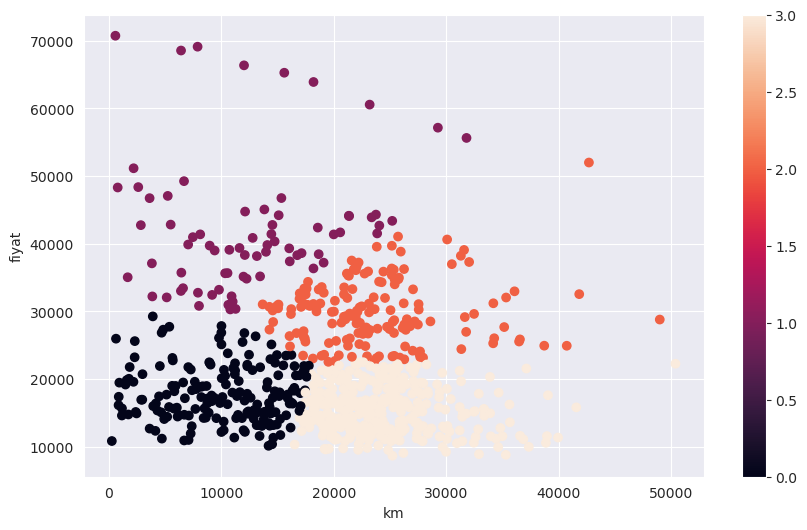

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x['Mileage'],x.Price,c=tahmin)
plt.colorbar()
plt.xlabel('km')
plt.ylabel('fiyat')

In [29]:
 #wcss = within cluster sum of squares
 wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4510408885814786
0.40339248588866156
0.33632286097208247
0.3757972710948999
0.3593667939761585
0.35576483423528854
0.33975316515200205
0.3470864377610543


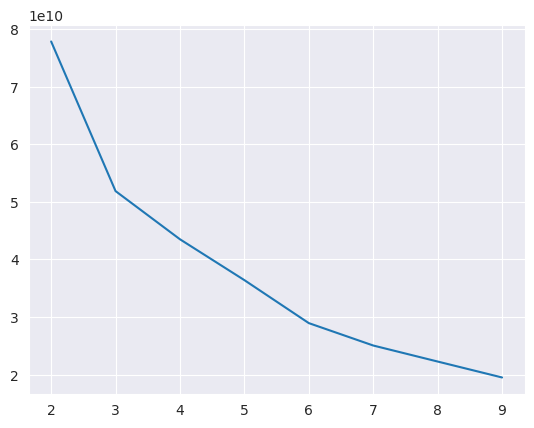

In [30]:
plt.plot(range(2,10),wcss)

In [31]:
import seaborn as sns

<Axes: >

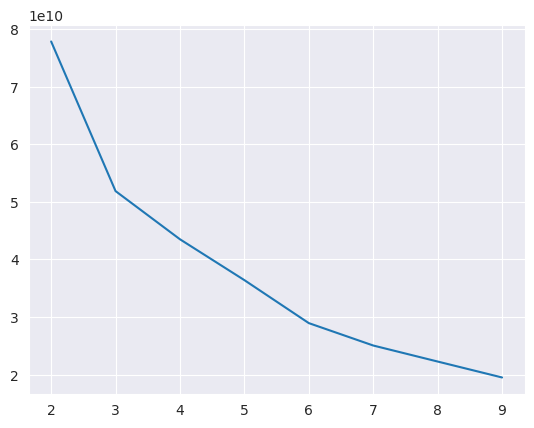

In [32]:
sns.lineplot(x=range(2,10),y=wcss)

In [34]:
# pip install yellowbrick

In [35]:
from yellowbrick.cluster import KElbowVisualizer

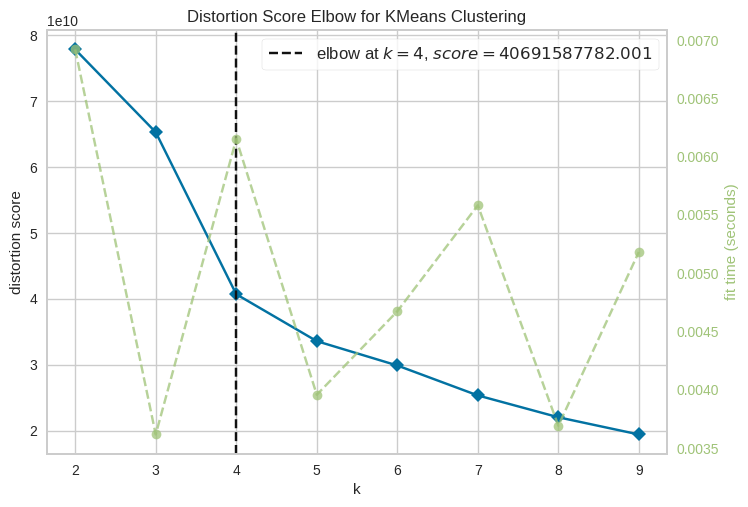

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [37]:
# Hierachical Clustering 

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
data=linkage(x,method='ward',metric='euclidean')

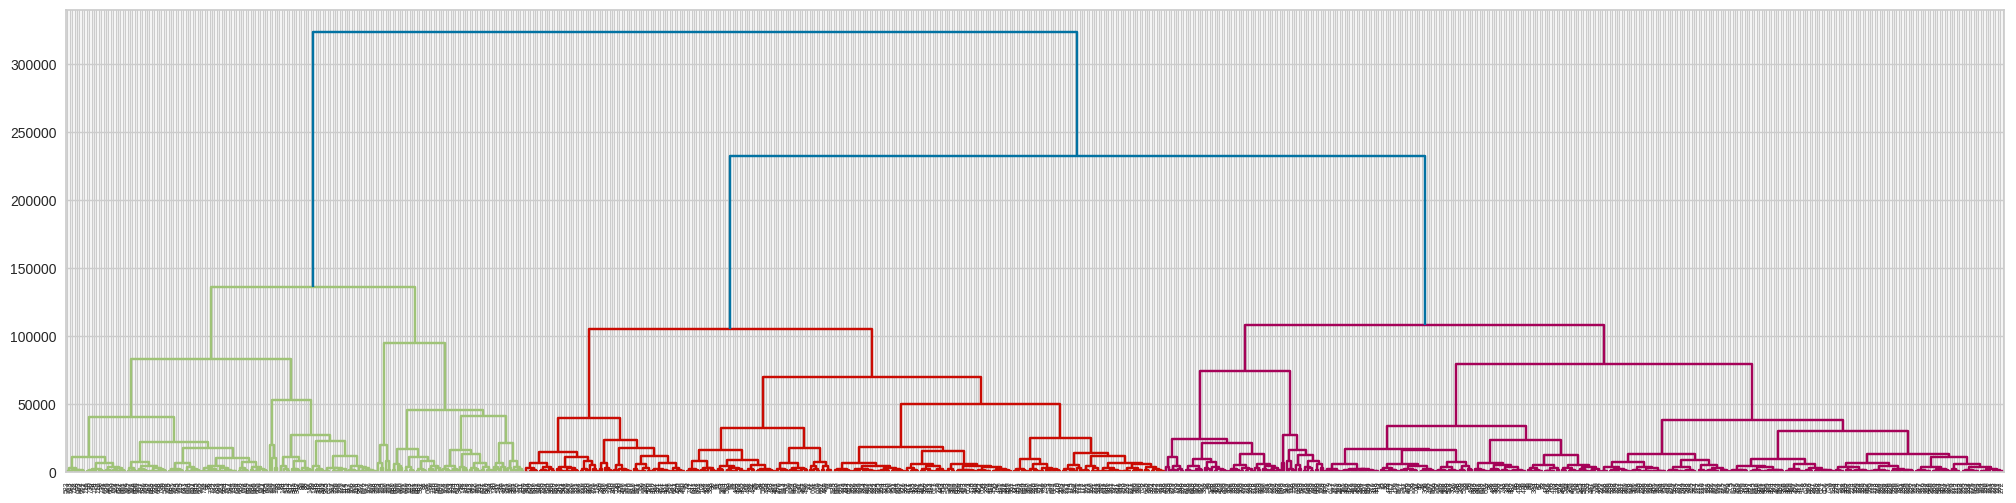

In [41]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [42]:
df=pd.read_csv('Billionaires.csv')

In [43]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

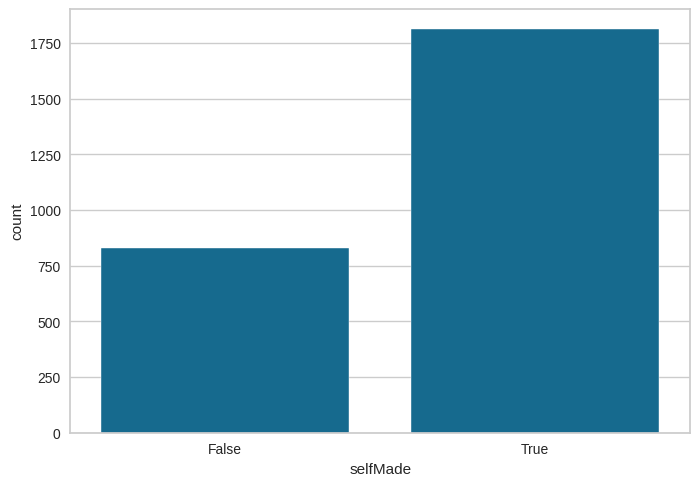

In [44]:
sns.countplot(x=df['selfMade'])

<Axes: xlabel='count', ylabel='country'>

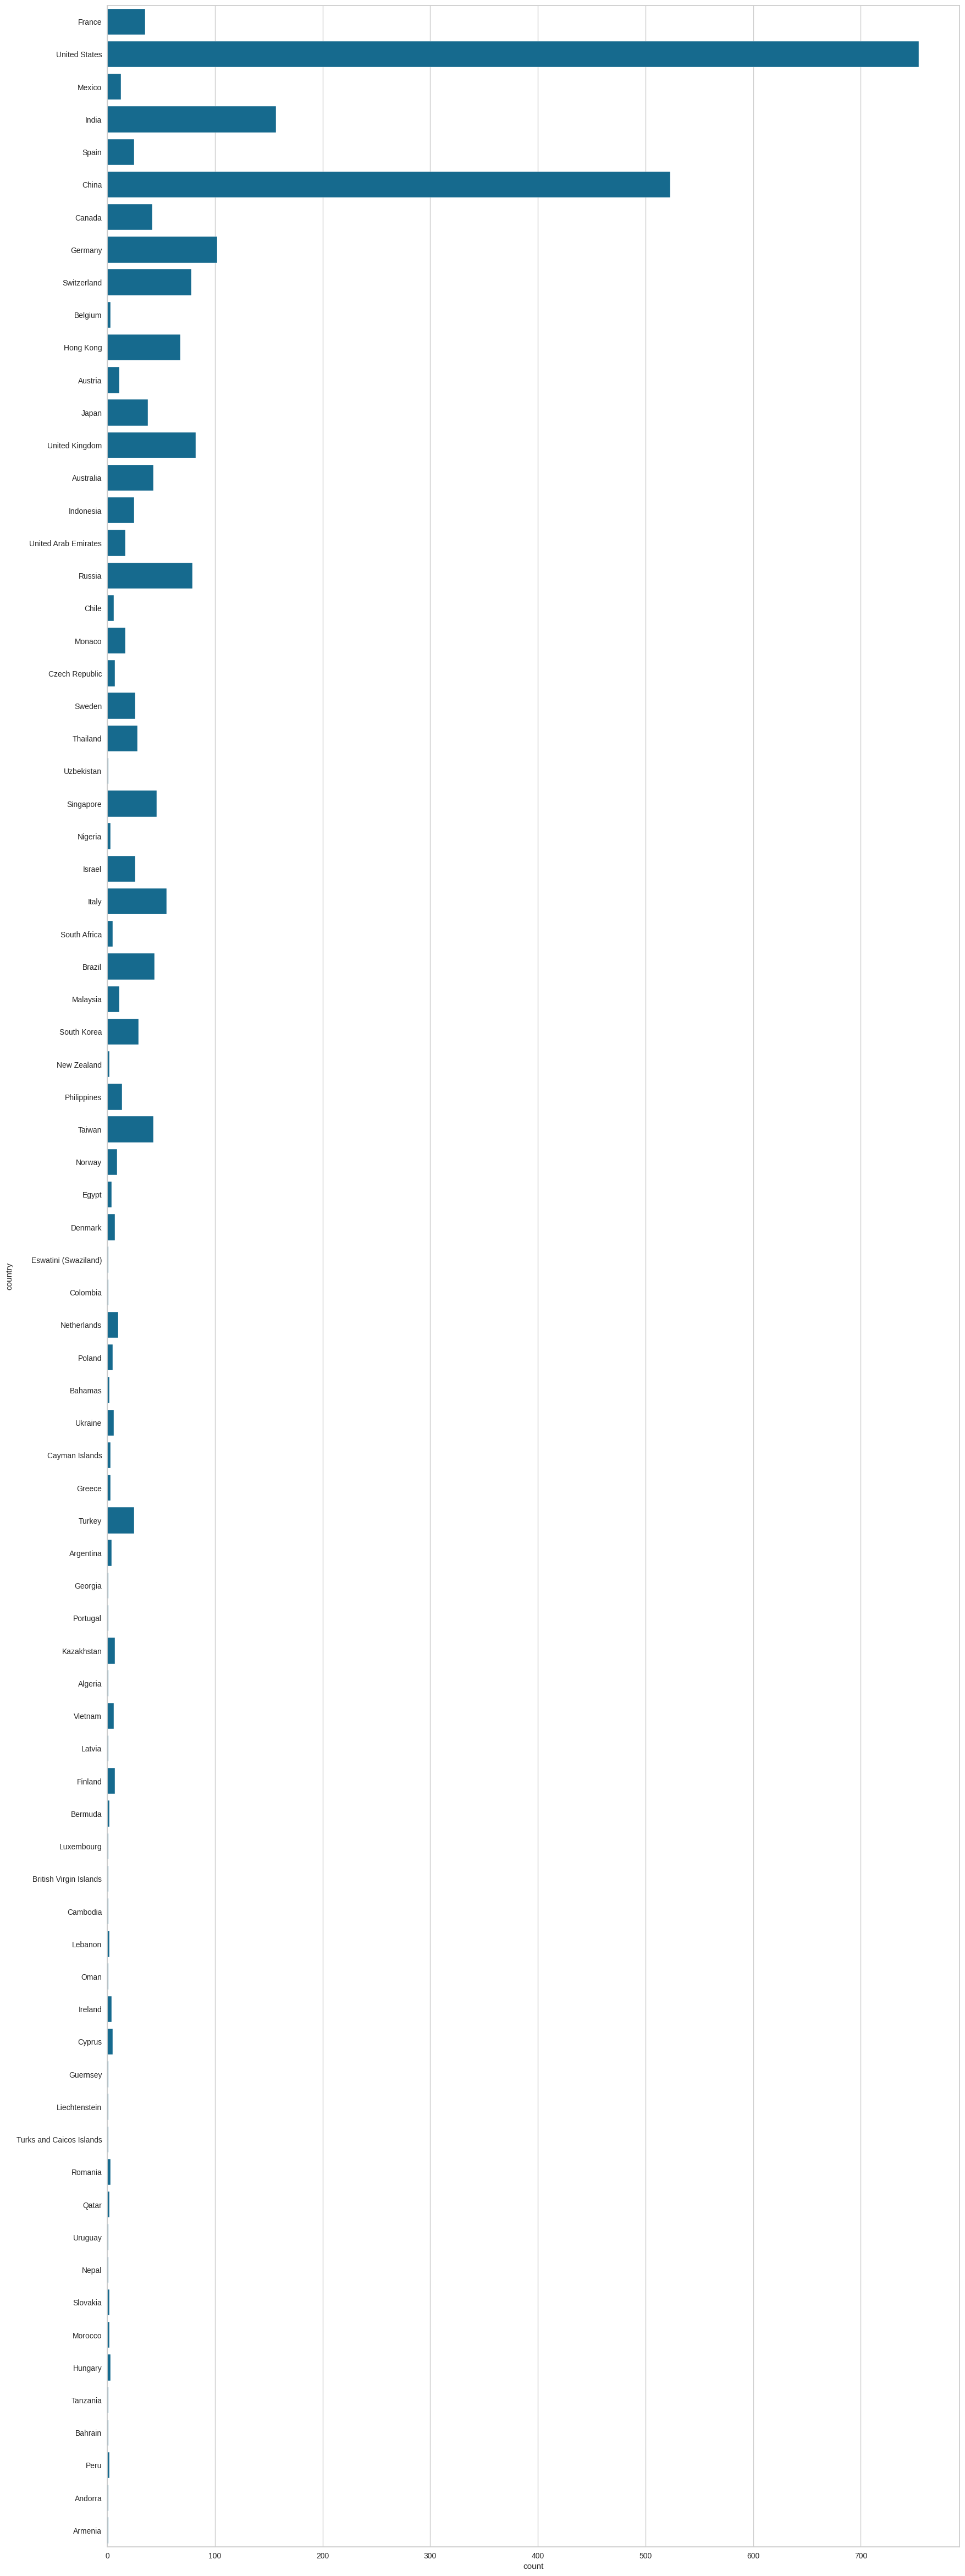

In [49]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'])

In [54]:
ydf=df['country'].value_counts().sort_values(ascending=False)

<Axes: xlabel='count', ylabel='country'>

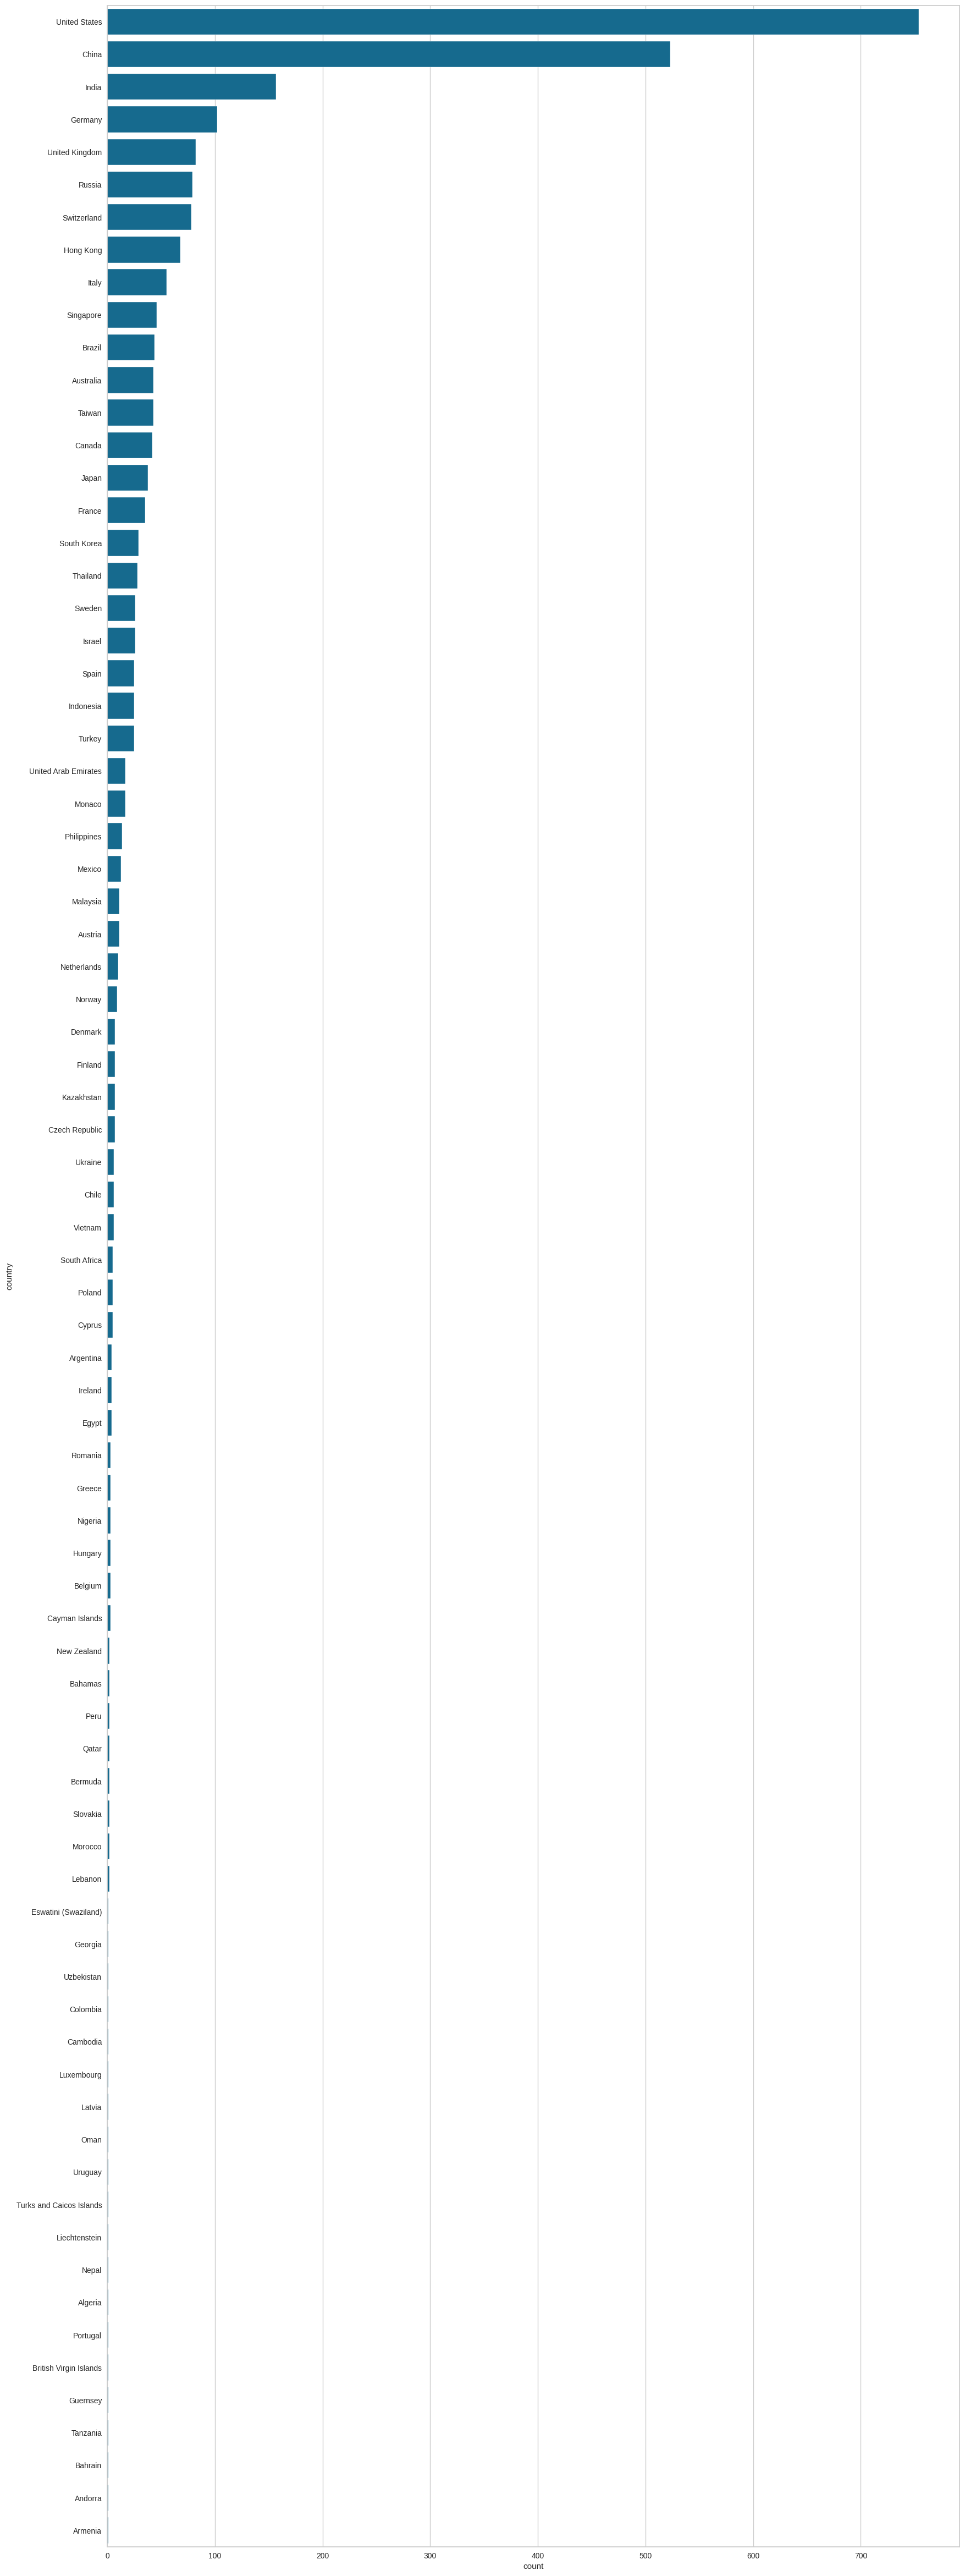

In [56]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'],order=ydf.index)

In [60]:
tr=df[df['country']=='Turkey']

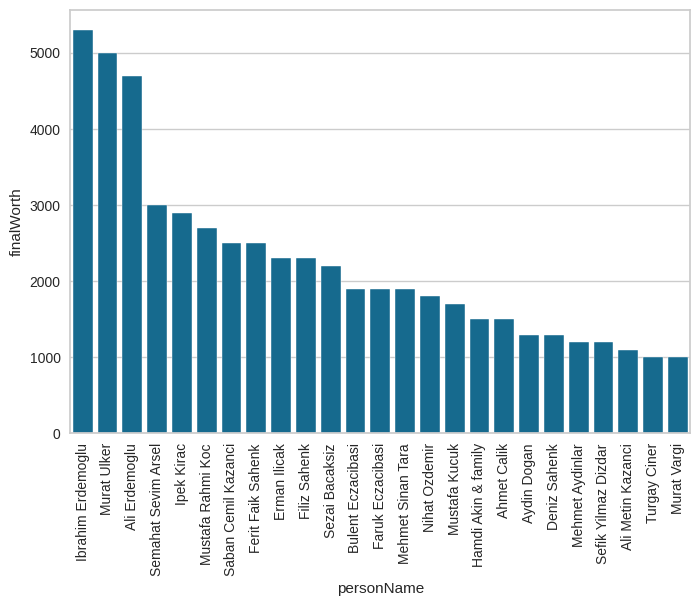

In [63]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

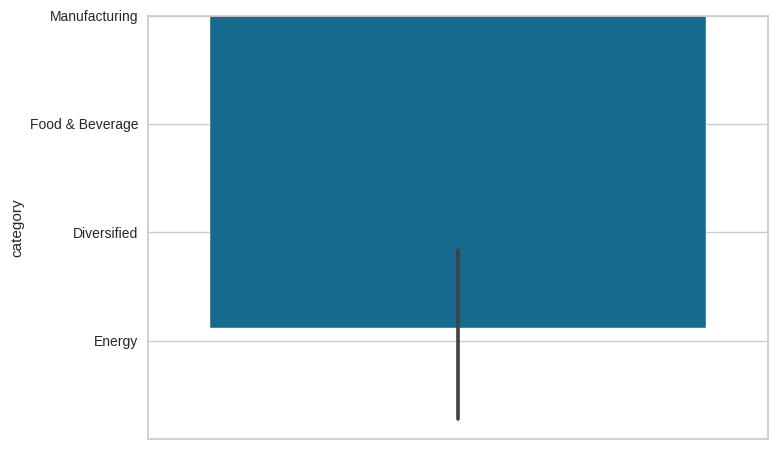

In [68]:
sns.barplot(y=tr['category'])
plt.xticks(rotation=90)
plt.show();

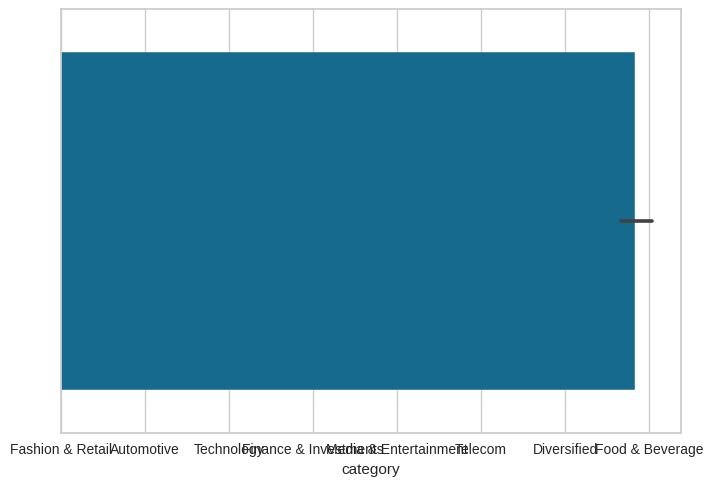

In [73]:
sns.barplot(x=df['category'])

plt.show();

<Axes: xlabel='gender', ylabel='count'>

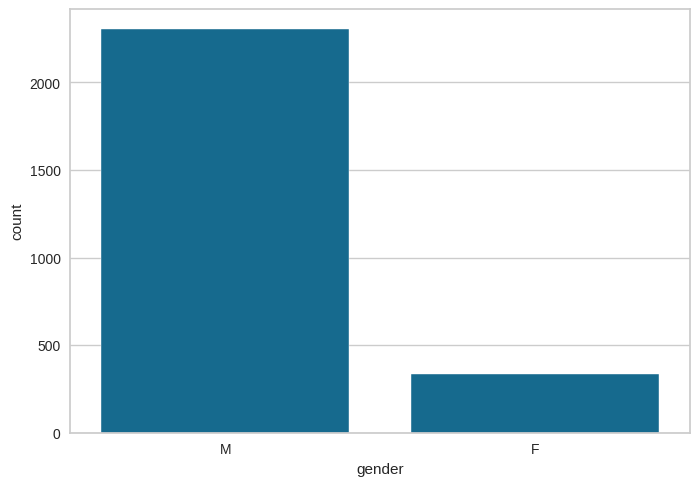

In [72]:
sns.countplot(x=df['gender'])

<Axes: xlabel='gender', ylabel='count'>

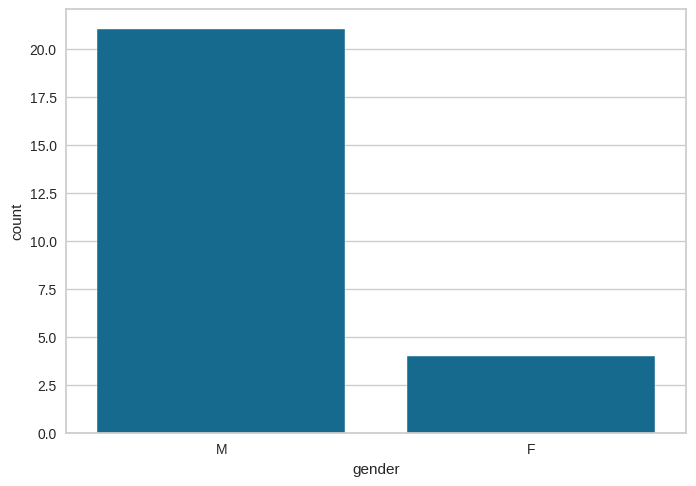

In [74]:
sns.countplot(x=tr['gender'])

In [75]:
df['gender'].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64

In [1]:
sns.countplot(x=tr['gender'])
df['gender'].value_counts()

NameError: name 'sns' is not defined